# Hello World !

### Objective

The objective of this Notebook is to explore the Stack Overflow 2018 Developer Survey dataset to generate insights about the professional and the personal aspects of developer's life with a little highlite on the top 10 countries participating in the survey

In [32]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load in 

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
sns.set_palette('Paired')

# Input data files are available in the "../input/" directory.
# For example, running this (by clicking run or pressing Shift+Enter) will list the files in the input directory

import os
from os.path import join
print(os.listdir("./"))
path = "./"

# Any results you write to the current directory are saved as output.

['.gitignore', 'README.md', '.git', 'Simple Eda.ipynb', 'survey_results_schema.csv', '.ipynb_checkpoints', '.gitignore.save', 'survey_results_public.csv']


## Reading the data

In [33]:
df = pd.read_csv(join(path, 'survey_results_public.csv'), low_memory=False)

In [34]:
df.head(1)

,Respondent,Hobby,OpenSource,Country,Student,Employment,FormalEducation,UndergradMajor,CompanySize,DevType,...,Exercise,Gender,SexualOrientation,EducationParents,RaceEthnicity,Age,Dependents,MilitaryUS,SurveyTooLong,SurveyEasy
0,1,Yes,No,Kenya,No,Employed part-time,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Mathematics or statistics,20 to 99 employees,Full-stack developer,...,3 - 4 times per week,Male,Straight or heterosexual,"Bachelor’s degree (BA, BS, B.Eng., etc.)",Black or of African descent,25 - 34 years old,Yes,NaN,The survey was an appropriate length,Very easy


In [35]:
pd.options.display.max_colwidth = 400
schema = pd.read_csv(join(path, 'survey_results_schema.csv'), low_memory=False)

# Helping functions

In [36]:
def plot_categorical_count(df, column, title='', limit=2, xtick_rotation='horizontal'):
    column_count = df[column].value_counts()[:limit]
    
    fig = plt.figure(figsize=(14, 8))
    sns.barplot(x=column_count.index, y=column_count.values, palette='Paired')
    sns.despine(left=True)
    plt.title(title, fontsize=16)
    plt.xticks(rotation=xtick_rotation)

def plot_heatmap(df, variable):
    l = []
    for name, group in top10_df.groupby('Country'):
        dff = pd.DataFrame(group[variable].value_counts() / group[variable].count()) 
        dff['Country'] = name
        dff['rate'] = dff.index
        l.append(dff)
    fig = plt.figure(figsize=(14, 8))
    df_2 = pd.concat(l)
    dff = df_2.pivot_table(index='Country', columns='rate')
    sns.heatmap(dff, cmap="YlGnBu", linewidths=.3)

# Top 10 Countries 

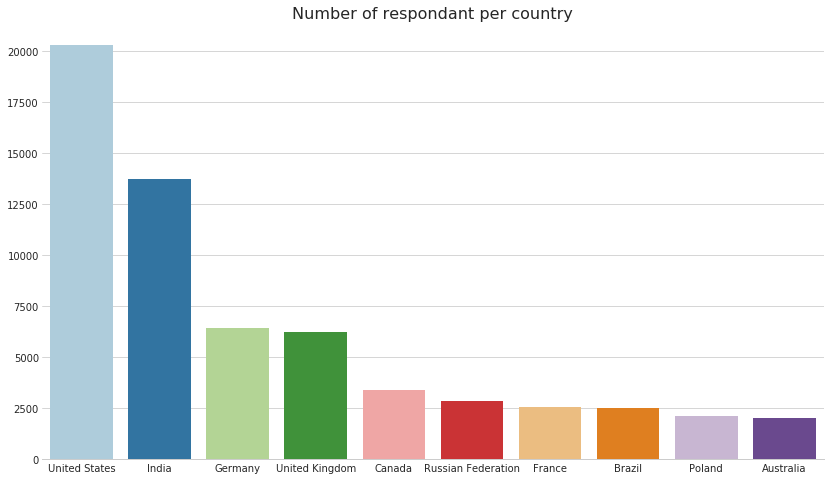

In [37]:
plot_categorical_count(df, column='Country', title='Number of respondant per country', limit=10)

> We can see that the USA is the country with the most respondant

# Hobbiest or Not

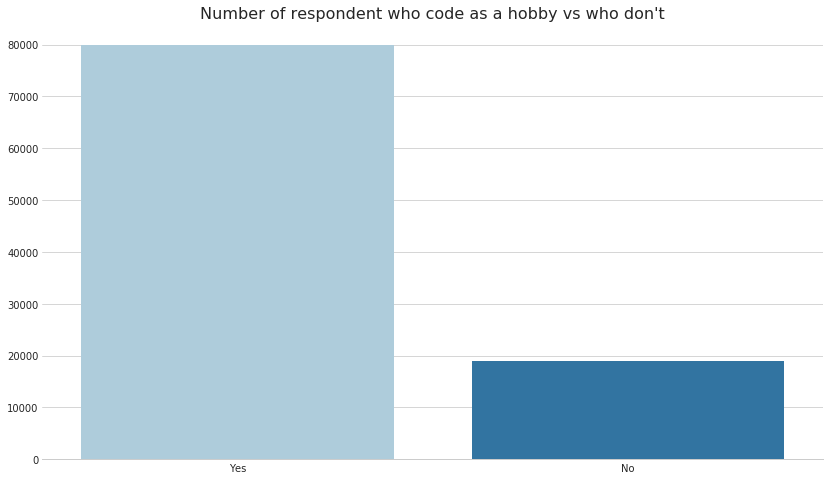

In [38]:
plot_categorical_count(df, 'Hobby', title='Number of respondent who code as a hobby vs who don\'t')

> Majority of the respondants code as a hobby.

# Open Source contributour

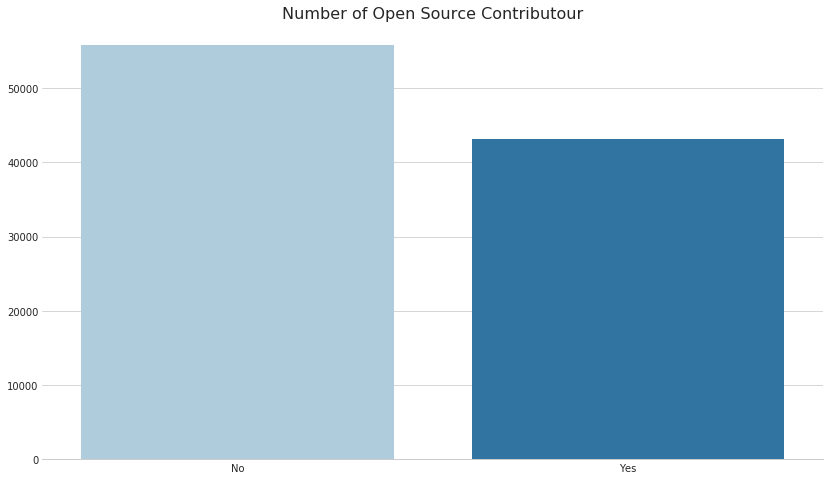

In [39]:
plot_categorical_count(df, 'OpenSource', title='Number of Open Source Contributour')


> The number of respondants who dpn't contribute to Open Source is higher than those who don't 

# Does coding as a hobby affect contributing to Open Source ??

Text(0.5,1,'Number of Open Source Contributour')

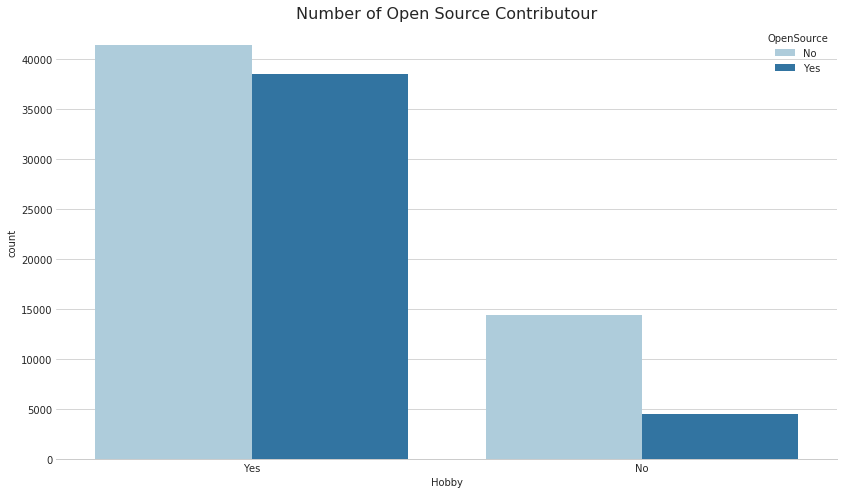

In [40]:
open_source_count = df['OpenSource'].value_counts()

plt.figure(figsize=(14, 8))
sns.countplot(df['Hobby'], palette='Paired', hue=df['OpenSource'])
sns.despine(left=True)
plt.title('Number of Open Source Contributour', fontsize=16)

> Thse who code as a hobby are more likely to contribute to Open source

# Student or Not ?

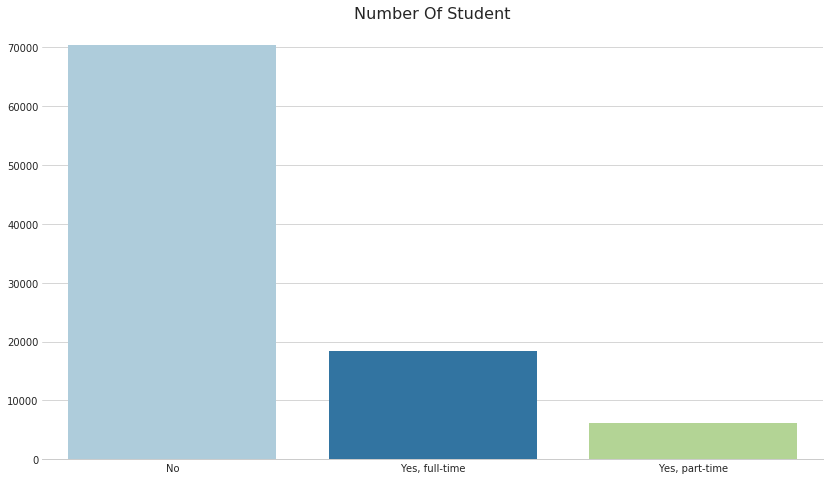

In [41]:
plot_categorical_count(df, 'Student', title='Number Of Student', limit=3)

 > Majority of respondants were not student.

# Employement Status

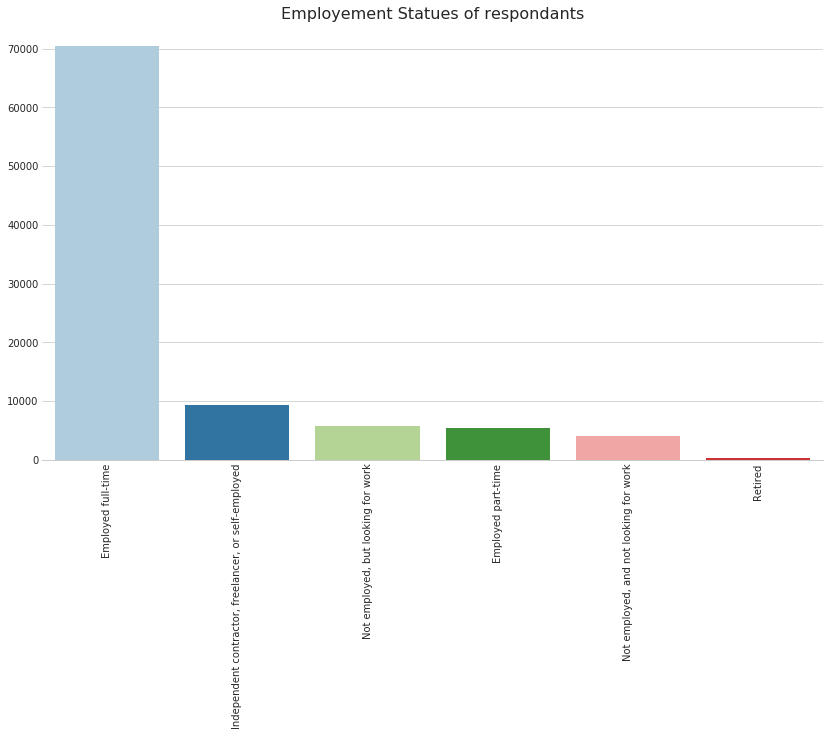

In [42]:
plot_categorical_count(df, 'Employment', title='Employement Statues of respondants', limit=6, xtick_rotation='vertical')

> Majority of respondants are working full time

# Male vs Female

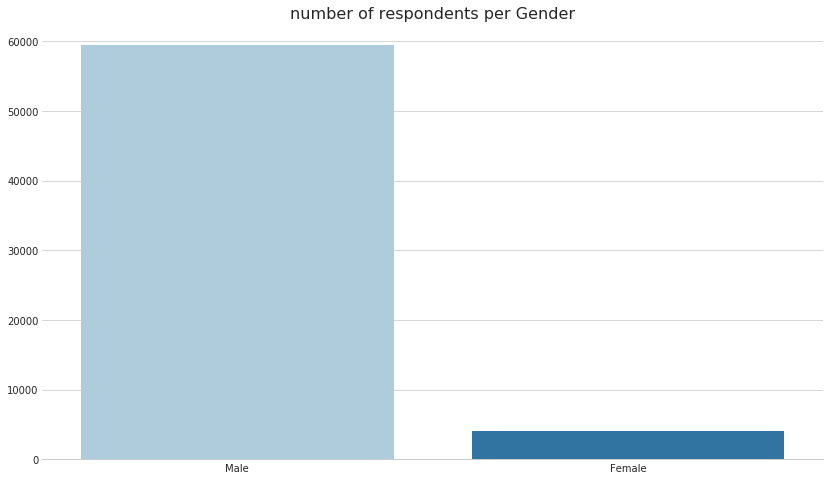

In [43]:
plot_categorical_count(df, 'Gender', title='number of respondents per Gender')

> We see that the majority of respondents were male

# When do developpers wake up ?

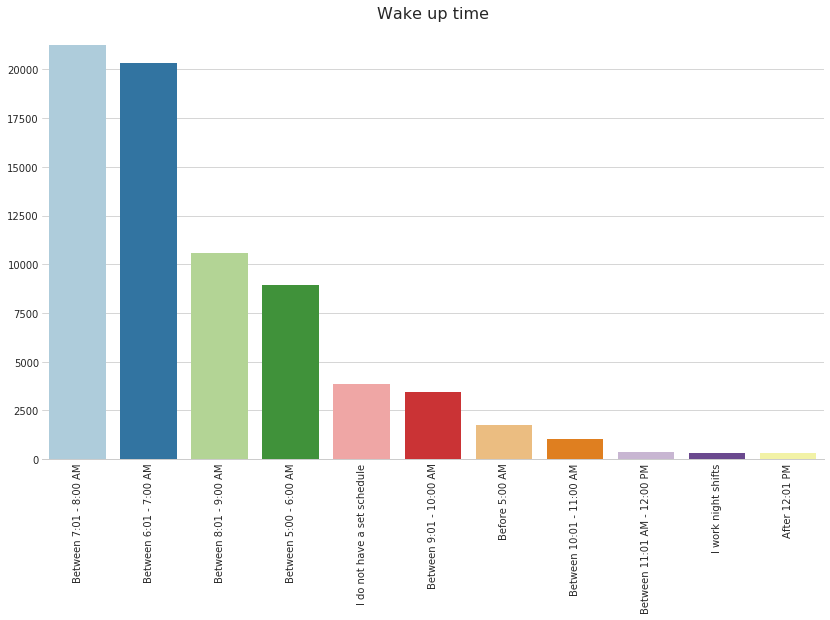

In [44]:
plot_categorical_count(df, 'WakeTime', title='Wake up time', limit=11, xtick_rotation='vertical')

> We can see that the majority of developpers wake up between 6:01 - 8:00 Am
> There is also a good amount of developper who wake up between 8:01 - 9:00 AM and between 5:00 - 6:00

# Respondents majors

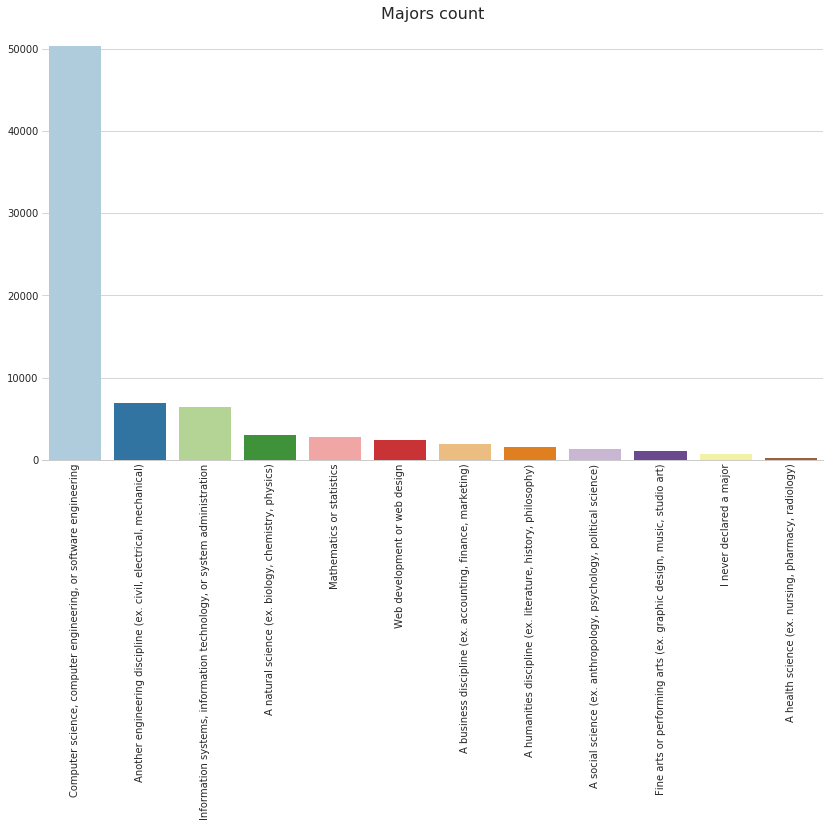

In [45]:
plot_categorical_count(df, 'UndergradMajor', 'Majors count', limit=100, xtick_rotation='vertical')

> As expected, the computer-related majors are dominating in the Stack overflow community

# Professional life in the Top 10 Countries
* In this section, we'll get a deeper look at the professional life in the top 10 countries participating in the survey

# Job Satisfaction in the top 10 countries

In [46]:
top_10_list = list(df['Country'].value_counts()[:10].index)
def st_not(row):
    if 'dissatisfied' in row:
        return 'Dissatisfied'
    return 'Satisfied'

df['sat_or_not'] = df['JobSatisfaction'].dropna().map(st_not)
#sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]
top10_df = df.where(df['Country'].isin(top_10_list))
sat_count = pd.DataFrame()
names = []
sat = []
disat = []
for name, group in top10_df.groupby('Country'):
    names.append(name)
    country_count = group['sat_or_not'].value_counts()
    sat.append(country_count['Satisfied'])
    
    #sat_count['Satisfied'] = country_count['Satisfied']
    #sat_count['Dissatisfied'] = country_count['Dissatisfied']
sat_count['Country'] = names
    #plt.figure(figsize=(14, 8))
#plt.plot(sat_count)
#sns.countplot(data=df, x='Country', hue='sat_or_not', palette='Paired', order=df['Country'].value_counts()[:10].index)
#sns.despine(left=True)
#plt.xticks(rotation='vertical')
sat_count

,Country
0,Australia
1,Brazil
2,Canada
3,France
4,Germany
5,India
6,Poland
7,Russian Federation
8,United Kingdom
9,United States


(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

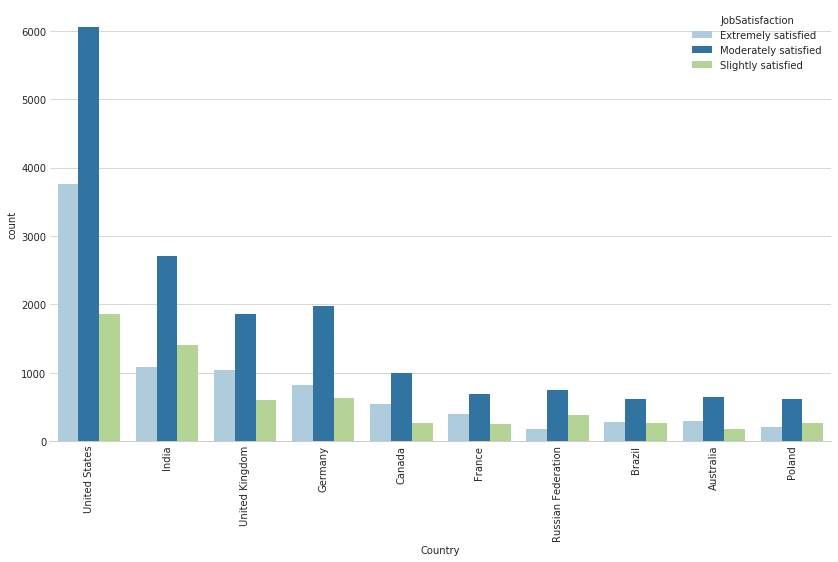

In [47]:
df['JobSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['JobSatisfaction'] == 'Moderately satisfied', df['JobSatisfaction'] == 'Extremely satisfied'), df['JobSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='JobSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> In the Top 10 countires, Developpers are moderatly satisfied with their jobs

# Career Satisfaction

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

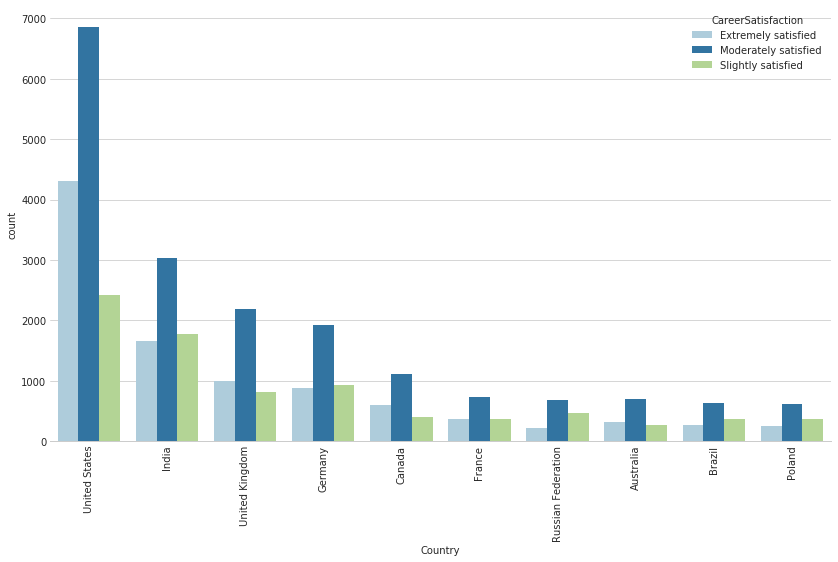

In [48]:
df['CareerSatisfaction'].value_counts()
sat = df[np.logical_or(np.logical_or(df['CareerSatisfaction'] == 'Moderately satisfied', df['CareerSatisfaction'] == 'Extremely satisfied'), df['CareerSatisfaction'] == 'Slightly satisfied')]

plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='CareerSatisfaction', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

# Salaries

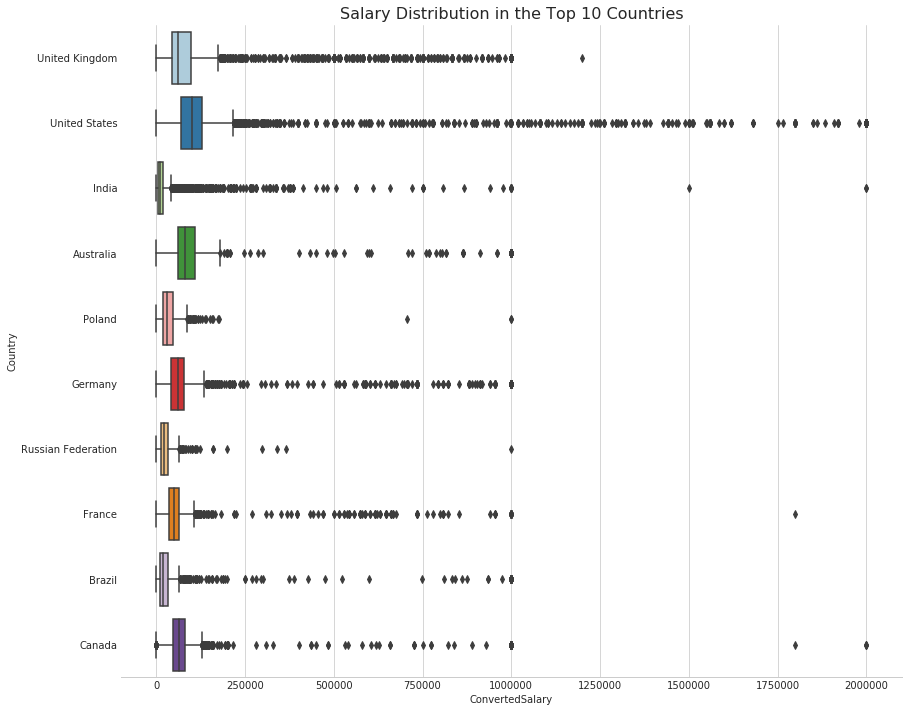

In [49]:
plt.figure(figsize=(14, 12))
df_top10 = df.where(df['Country'].isin(top_10_list))

sns.boxplot(data=df_top10, x='ConvertedSalary', y='Country', palette='Paired')
plt.title('Salary Distribution in the Top 10 Countries', fontsize=16)
sns.despine(left=True)

> We see that USA developpers are the most paid, while indian developpers are the worst.

# Productivity time

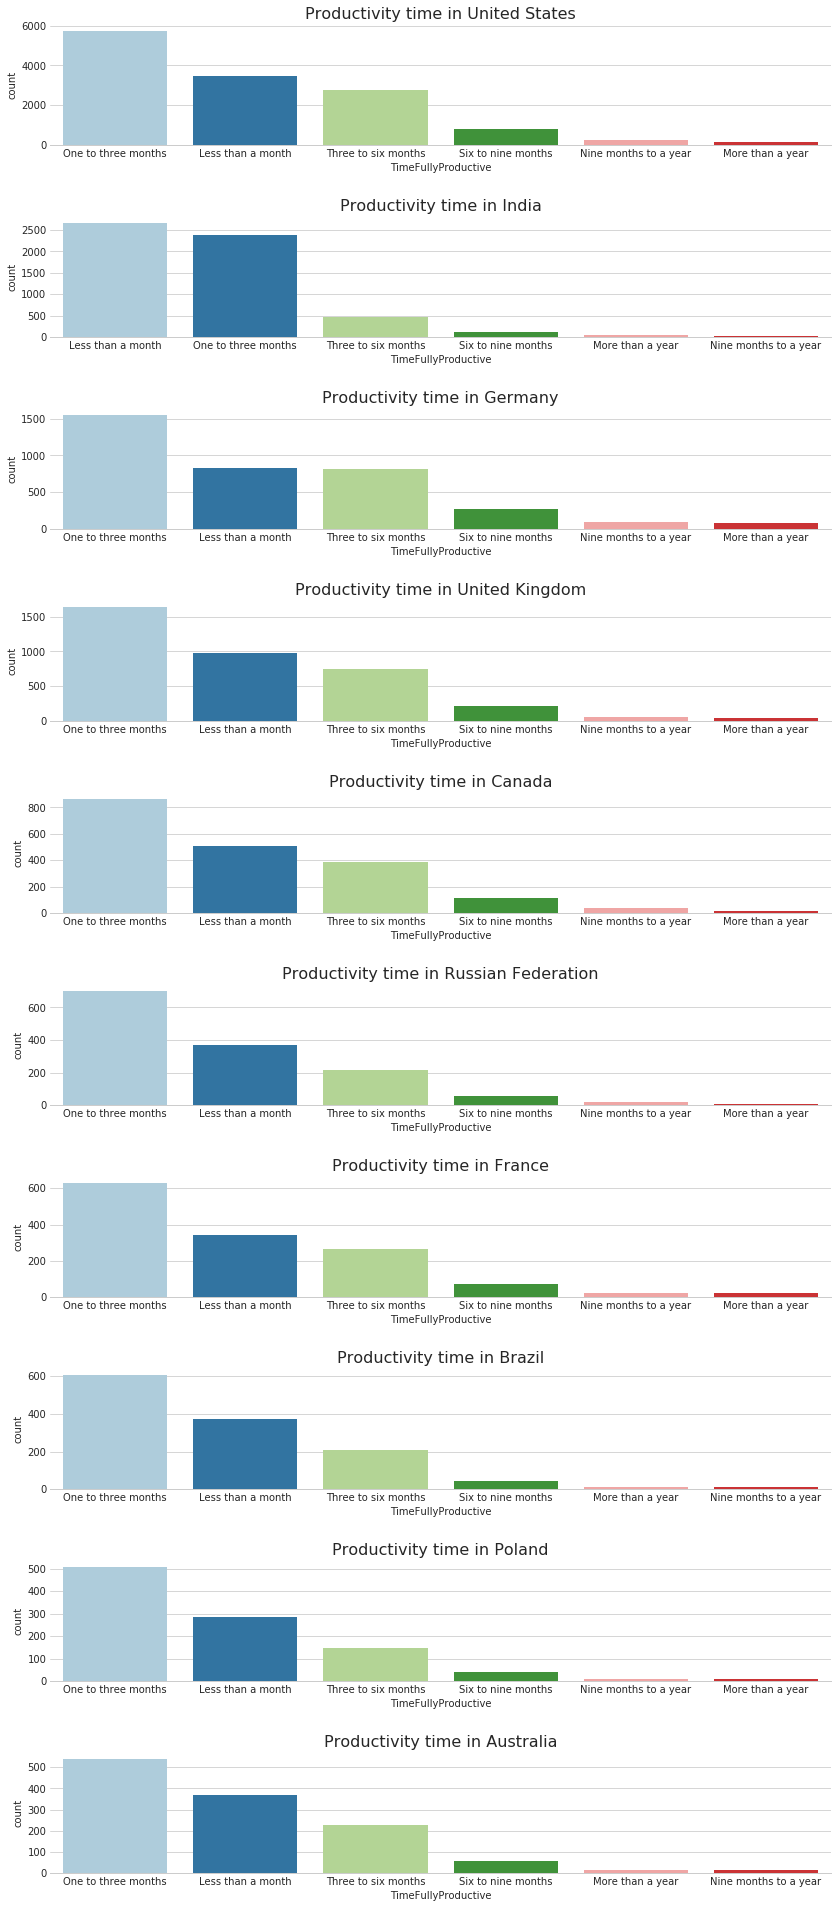

In [50]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='TimeFullyProductive', palette='Paired', ax=ax, order=data['TimeFullyProductive'].value_counts().index)
    ax.set_title('Productivity time in {}'.format(country), fontsize=16)
    #plt.xticks(rotation='vertical')
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

# Years coding professionally

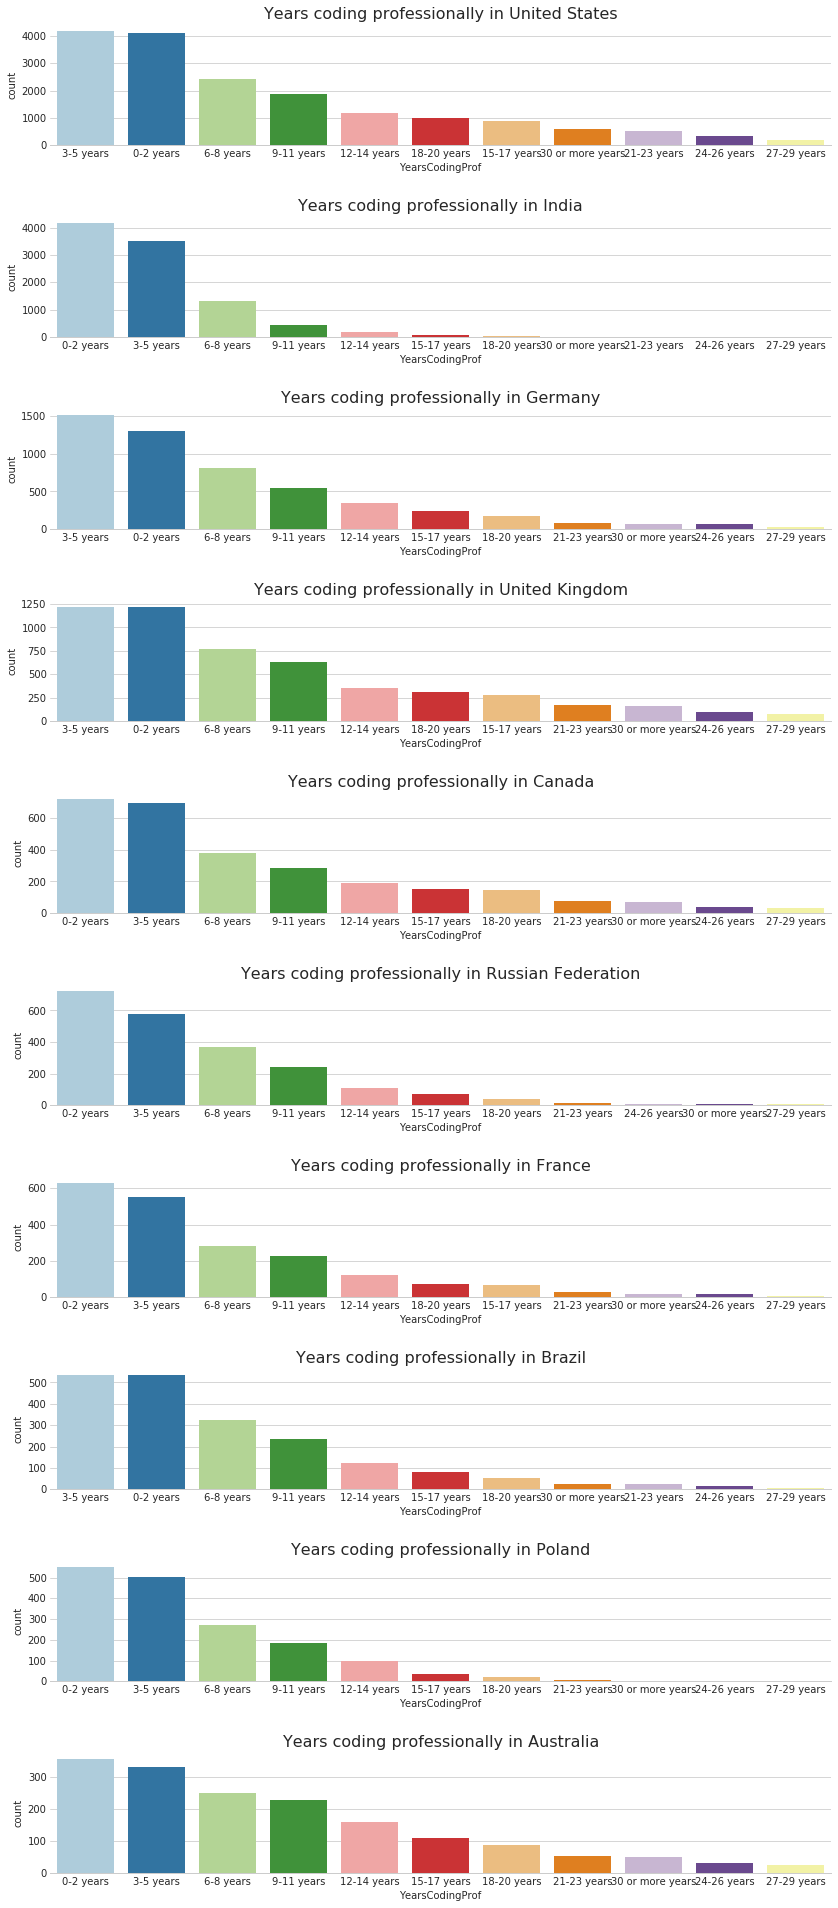

In [51]:
fig, axes = plt.subplots(10, 1, figsize=(14, 34))

for ax, country in zip(axes, top_10_list):
    data = df[df['Country'] == country]
    sns.countplot(data=data, x='YearsCodingProf', palette='Paired', ax=ax, order=data['YearsCodingProf'].value_counts().index)
    ax.set_title('Years coding professionally in {}'.format(country), fontsize=16)
    #plt.xticks(rotation='vertical')
    sns.despine(left=True)
plt.subplots_adjust(hspace=.6)

# Importance of different job aspects to assess a potential job offer in the top 10 countries

# Importance of the industry to work in

Text(0.5,1,'Importance of Industry to assess potential job')

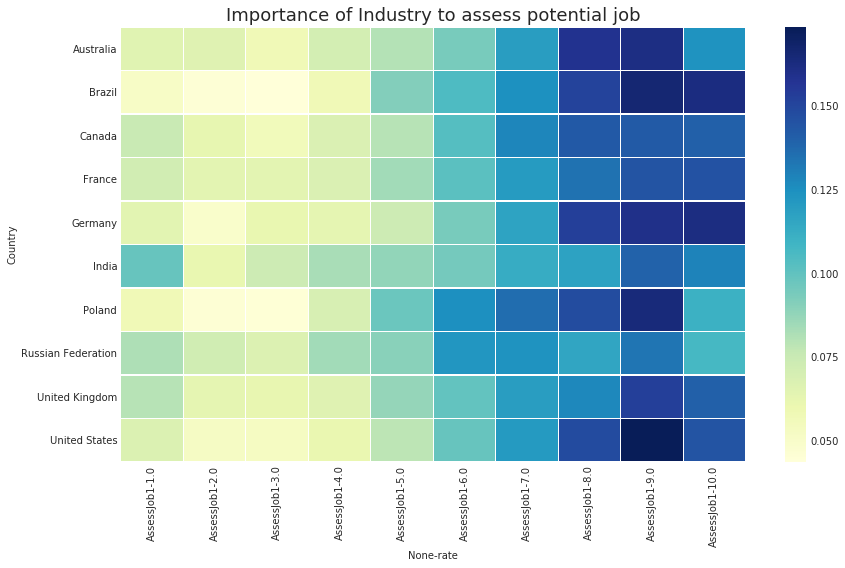

In [52]:
top10_df = df.where(df['Country'].isin(top_10_list))
plot_heatmap(top10_df, 'AssessJob1')    
plt.title('Importance of Industry to assess potential job', fontsize=18)

> *  It seems like the industry to work in is not an important factor for developpers to assess a potential job oppotunity.
* indian developpers seems to give the most importance to the industry to work for, in assessing a potential job offer.

# Importance of The financial performance or funding status of the company or organization

Text(0.5,1,'Importance of financial performance to assess potential job')

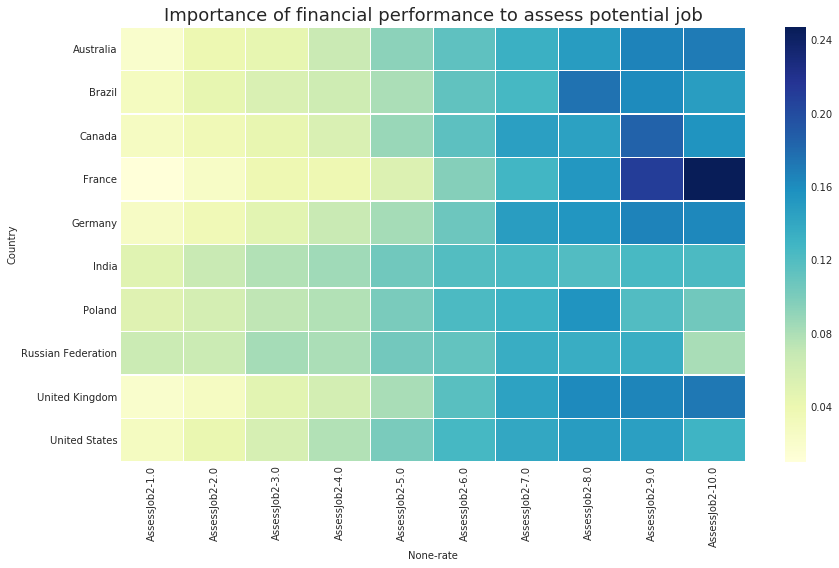

In [53]:
plot_heatmap(top10_df, 'AssessJob2')    
plt.title('Importance of financial performance to assess potential job', fontsize=18)

> * We can see that the financial statut of the company is not that important to developpers to assess a potential job offer.
* French develoopers seems to give the less importance to the financial statut of the company than developpers in the other 9 country. 

# Importance of The specific department or team to be working on


Text(0.5,1,'Importance of the department or team to be working on')

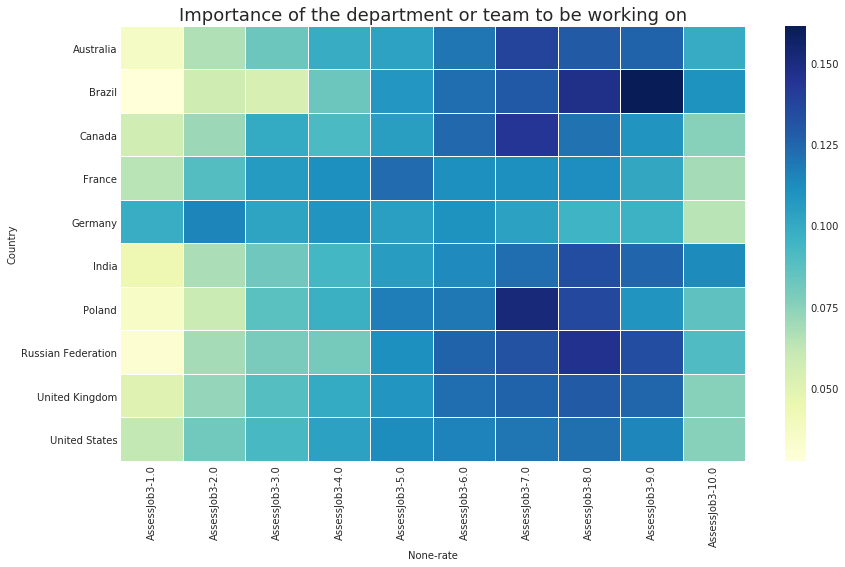

In [54]:
plot_heatmap(top10_df, 'AssessJob3')    
plt.title('Importance of the department or team to be working on', fontsize=18)

> * We can see that the departement or the team to be working in is slightly important to assess a potential job offer.
* German developpers give the most importance to the departement or the team to be working in.
* Brazilian developpers give the less importance to the departement or the team to be working in.

# Importance of The languages, frameworks, and other technologies

Text(0.5,1,'Importance of The languages, frameworks, and other technologies')

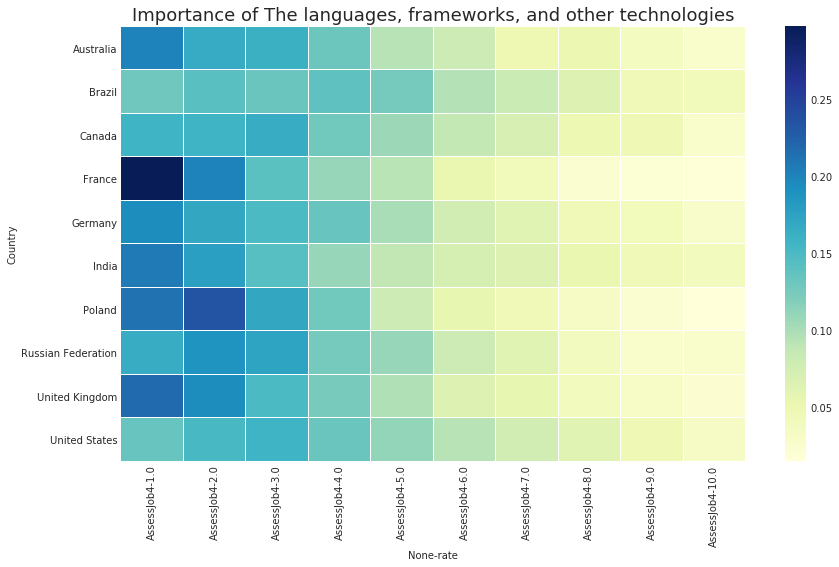

In [55]:
plot_heatmap(top10_df, 'AssessJob4')    
plt.title('Importance of The languages, frameworks, and other technologies', fontsize=18)

> * We can see that languages, frameworks or technologies is an important facotor for developpers in the 10 countries to assess a potential job offer.
* Frensh developers seem to give the most importance to languages, frameworks or technologies to work with.

# Importance of The compensation and benefits offered

Text(0.5,1,'Importance of compensation and benefits offered')

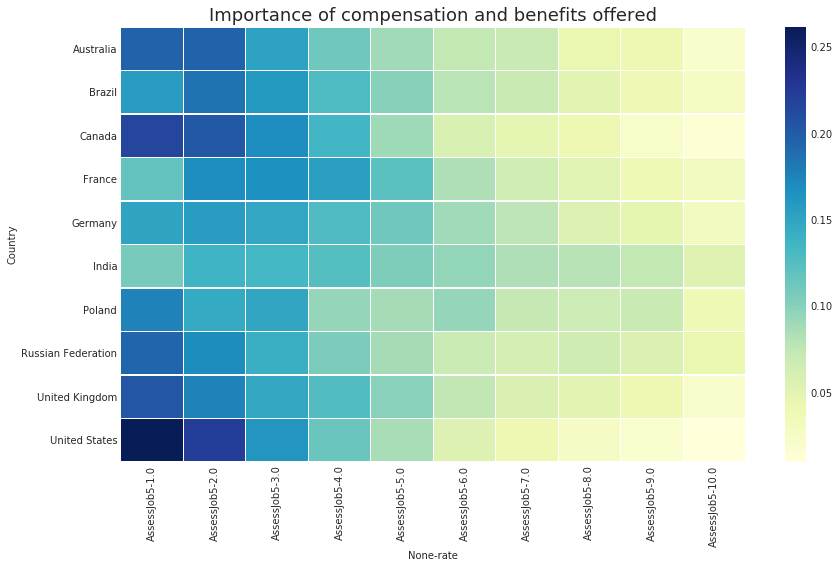

In [56]:
plot_heatmap(top10_df, 'AssessJob5')    
plt.title('Importance of compensation and benefits offered', fontsize=18)

> * Compensations and benefits play an important role for developers in the 10 countries to assess a potential job offer.
* American, Canadian, and Australian developers are the one who give the most importance to compensastion and benefits among developers in the 10 countries.

# Importance of The office environment or company culture

Text(0.5,1,'Importance of The office environment or company culture')

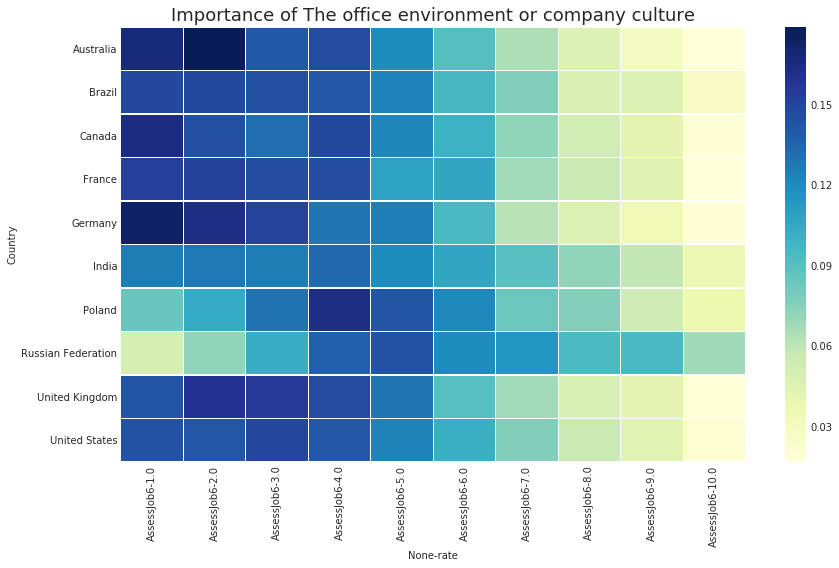

In [57]:
plot_heatmap(top10_df, 'AssessJob6')    
plt.title('Importance of The office environment or company culture', fontsize=18)

> * office environment or company culture is so important for developers in the 10 countries to ass a potential job.
* It seems like russian developers are the ones who less value the importance of the office environment or company culture.

# Importance of The opportunity to work from home/remotely

Text(0.5,1,'Importance of The opportunity to work from home/remotely')

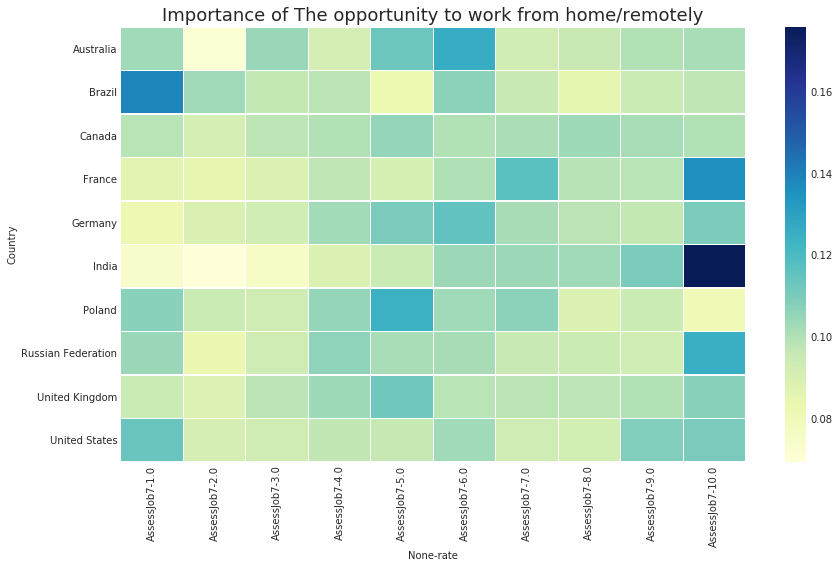

In [58]:
plot_heatmap(top10_df, 'AssessJob7')    
plt.title('Importance of The opportunity to work from home/remotely', fontsize=18)

> * Working from home or remotly seems very uninteresting for indian developers.
* Developers on the other countries doesn't care so much about working remotly. 
* brazilian developers seems to be interesting in working remotely.

# Importance of Opportunities for professional development

Text(0.5,1,'Importance of Opportunities for professional development')

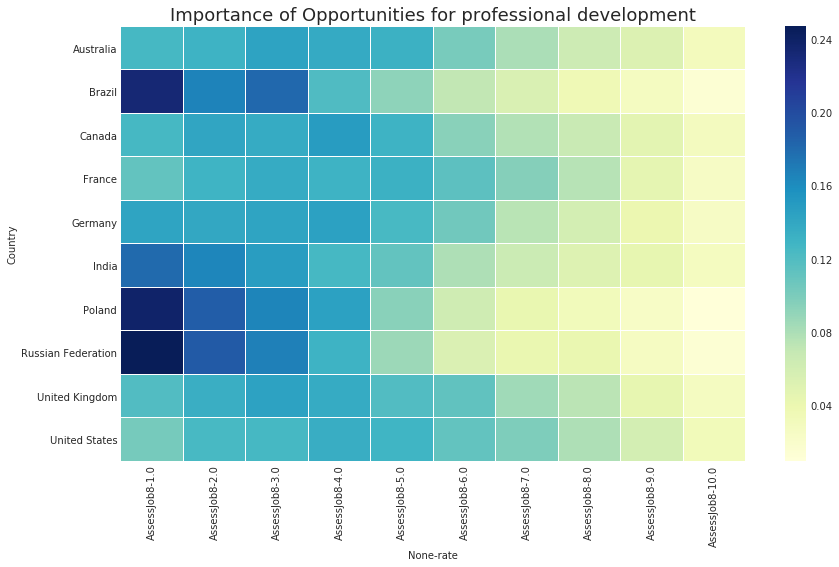

In [59]:
plot_heatmap(top10_df, 'AssessJob8')    
plt.title('Importance of Opportunities for professional development', fontsize=18)

> * Opportunities for professional development is an important factors for developers in the 10 countries to assess a potential job offer.
* Brazilian, polish and russian developers are the ones who give the most importance of Opportunities for professional development.

# Importance of The diversity of the company or organization

Text(0.5,1,'Importance of The diversity of the company or organization')

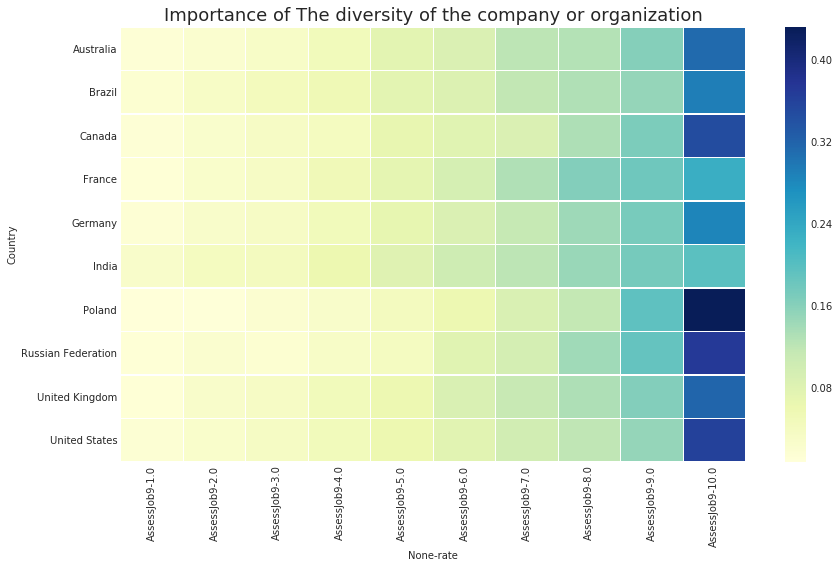

In [60]:
plot_heatmap(top10_df, 'AssessJob9')    
plt.title('Importance of The diversity of the company or organization', fontsize=18)

> * Developers in the 10 countries don't care that much about the diversity of the company.

# Importance of How widely used or impactful the product or service

Text(0.5,1,'Importance of How widely used or impactful the product or service')

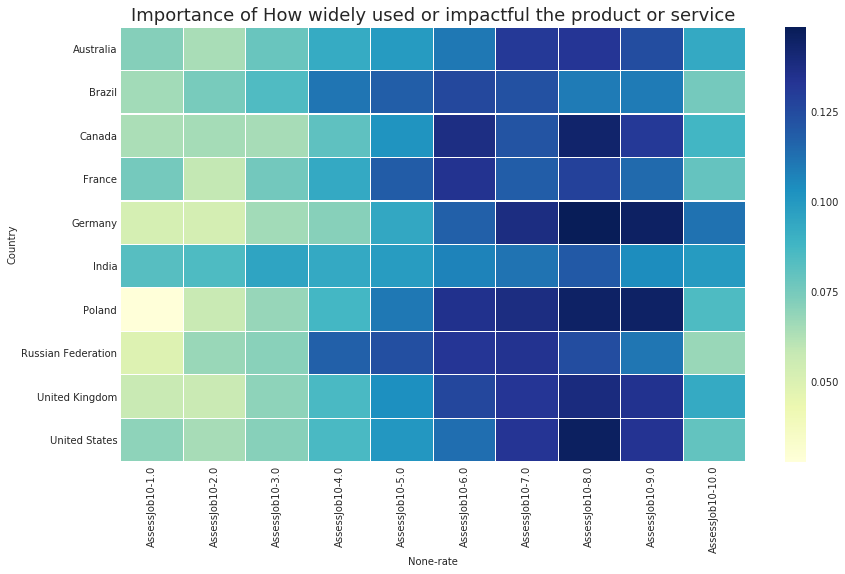

In [61]:
plot_heatmap(top10_df, 'AssessJob10')    
plt.title('Importance of How widely used or impactful the product or service', fontsize=18)

> * The impact of the product or the service to be working doesn't seem to be an important factor in assessing a potential job offer.
* Indian developers seems to give the most importance to the product or the service to be working in. 

# Job assessement comparaison by country

Text(0.5,1,'Job assessement comparaison by country')

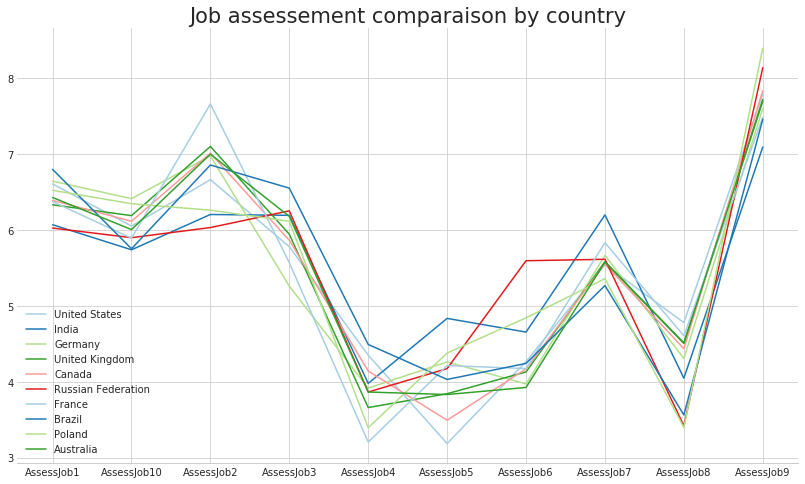

In [62]:
job_assesement = [
    'AssessJob1', 'AssessJob2', 'AssessJob3', 'AssessJob4', 'AssessJob5', 
    'AssessJob6','AssessJob7', 'AssessJob8', 'AssessJob9', 'AssessJob10'
]
ff = top10_df.groupby('Country').mean()[job_assesement].reset_index()
ff_p = ff.pivot_table(columns='Country')
plt.figure(figsize=(14, 8))
for country in top_10_list:
    plt.plot(ff_p[country], label=country)
plt.legend()
sns.despine(left=True)
plt.title('Job assessement comparaison by country', fontsize=21)

> * We can see that the importance of the differnet aspects of a job opportunity is similaire in the ten countries.
* The languages, frameworks, and other technologies to work with, The compensation and benefits offered, The office environment or company culture and the Opportunities for professional development are the most important aspects to assess a potential job offer.


# Importance of different benefits package aspects to assess a potential job offer

# Importance of the Salary and/or bonuses

Text(0.5,1,'Importance of the Salary and/or bonuses')

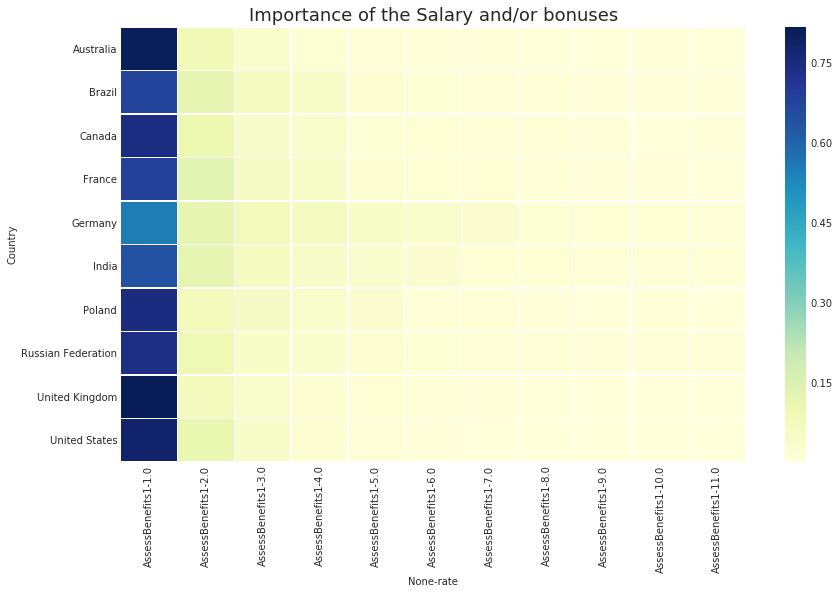

In [63]:
plot_heatmap(top10_df, 'AssessBenefits1')    
plt.title('Importance of the Salary and/or bonuses', fontsize=18)

> * It seems like the salary and/or the bonuse is the most important factors for developers to assess a potential job offer.

# Importance of Stock options or shares

Text(0.5,1,'Importance of Stock options or shares')

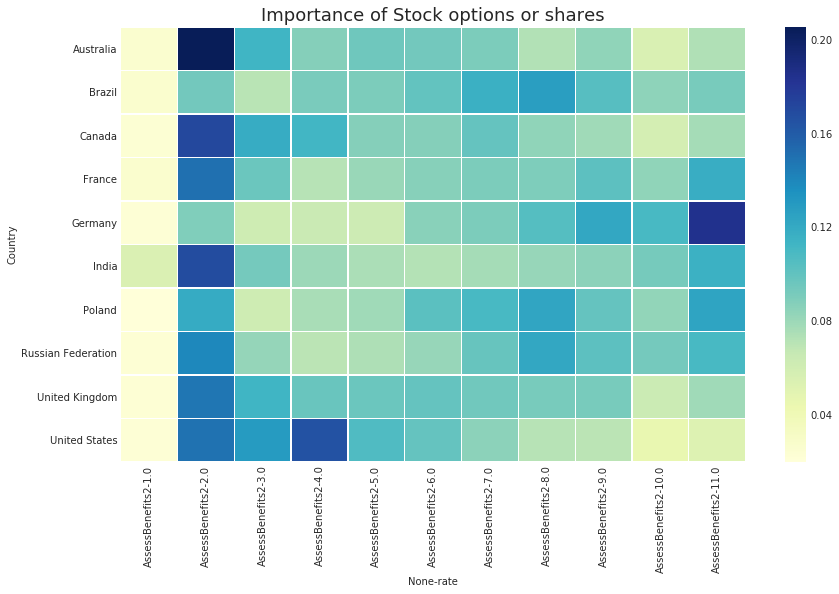

In [64]:
plot_heatmap(top10_df, 'AssessBenefits2')    
plt.title('Importance of Stock options or shares', fontsize=18)

> * Stock options or shares seems to be somewhat important in assessing a potential job offer.
* Among developers in the 10 country, german developers are the ones who less value the importance of stock options and shares, while australian developers seems to be the opposite.

# Importance of Health insurance

Text(0.5,1,'Importance of of Health insurance')

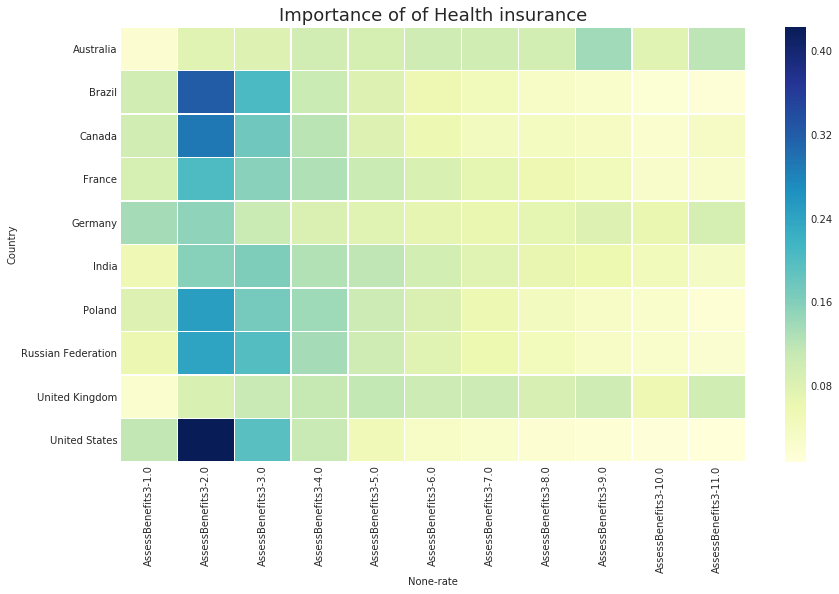

In [65]:
plot_heatmap(top10_df, 'AssessBenefits3')    
plt.title('Importance of of Health insurance', fontsize=18)

> Offering Health insurance might be the second important factor for developers in the 10 countries to assess potential job's benefits package.

# Importance of Parental leave

Text(0.5,1,'Importance of of Health insurance')

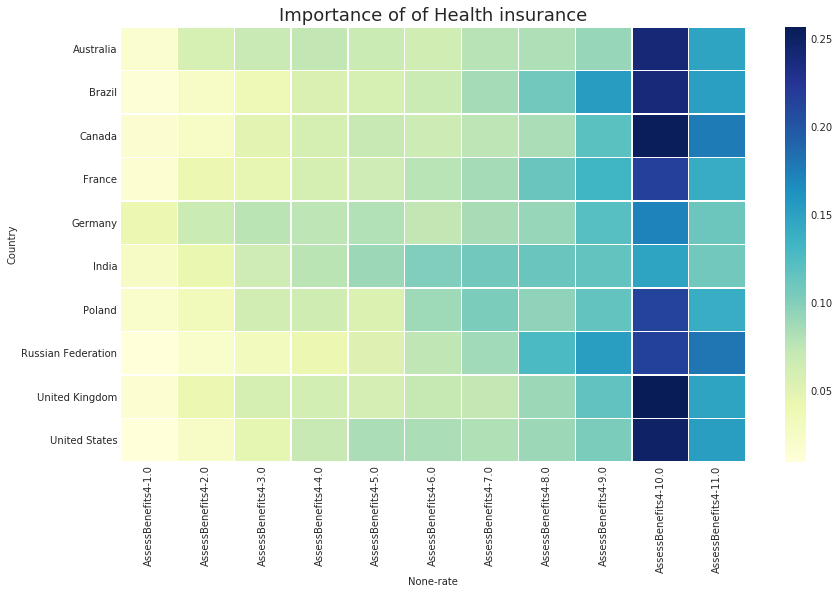

In [66]:
plot_heatmap(top10_df, 'AssessBenefits4')    
plt.title('Importance of of Health insurance', fontsize=18)

> * offering parental leave and is not that importance in assessing job's benefits package.

# Importance of Fitness or wellness benefit

Text(0.5,1,'Importance of Fitness or wellness benefit')

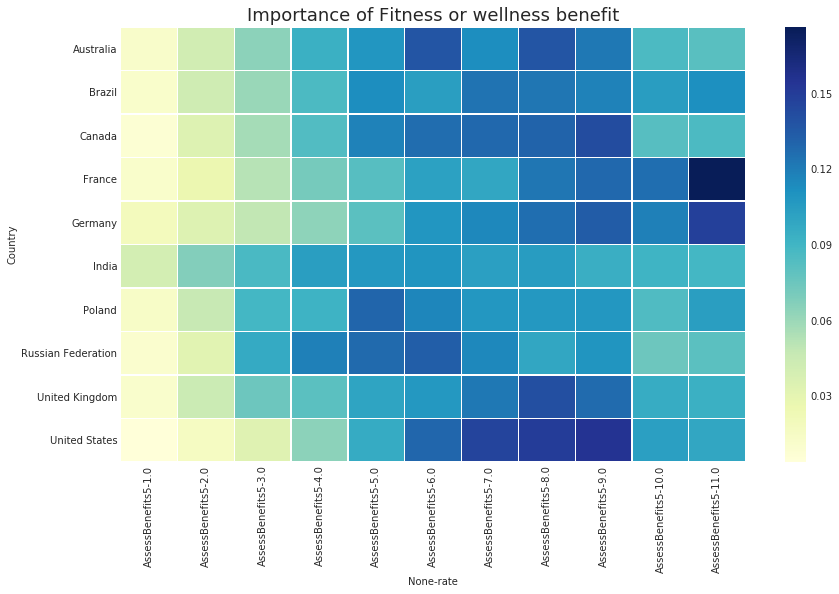

In [67]:
plot_heatmap(top10_df, 'AssessBenefits5')    
plt.title('Importance of Fitness or wellness benefit', fontsize=18)

> * Offering Fitness or wellness benefits seems slightly important for developers in the 10 countries.
* Frensh and German developers are the ones who value the less offering Fitness or wellness benefits.

# Importance of Retirement or pension savings matching

Text(0.5,1,'Importance of  Retirement or pension savings matching')

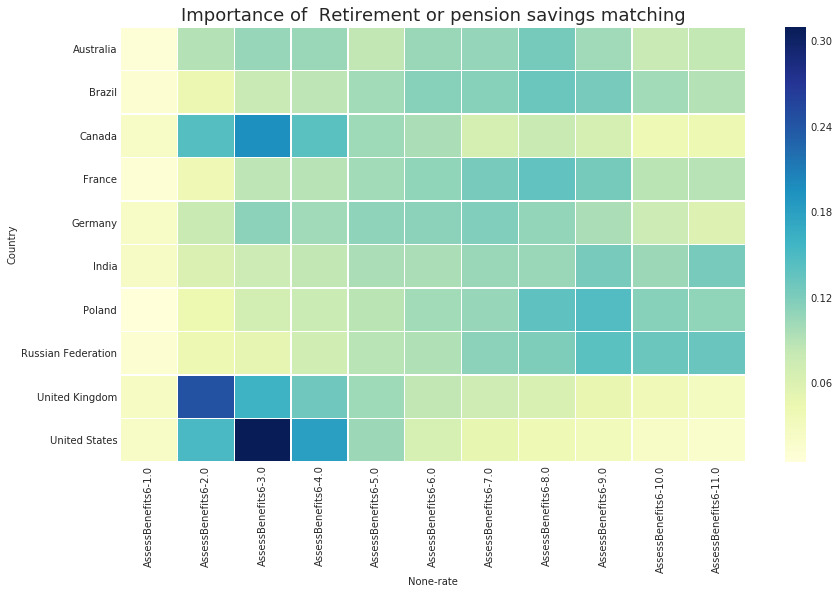

In [68]:
plot_heatmap(top10_df, 'AssessBenefits6')    
plt.title('Importance of  Retirement or pension savings matching', fontsize=18)

> * Offering  Retirement or pension savings matching, seems very important for americain and england developers.
* While for the other 8 countries, is not that important.

# Importance of Company-provided meals or snacks

Text(0.5,1,'Importance of Company-provided meals or snacks')

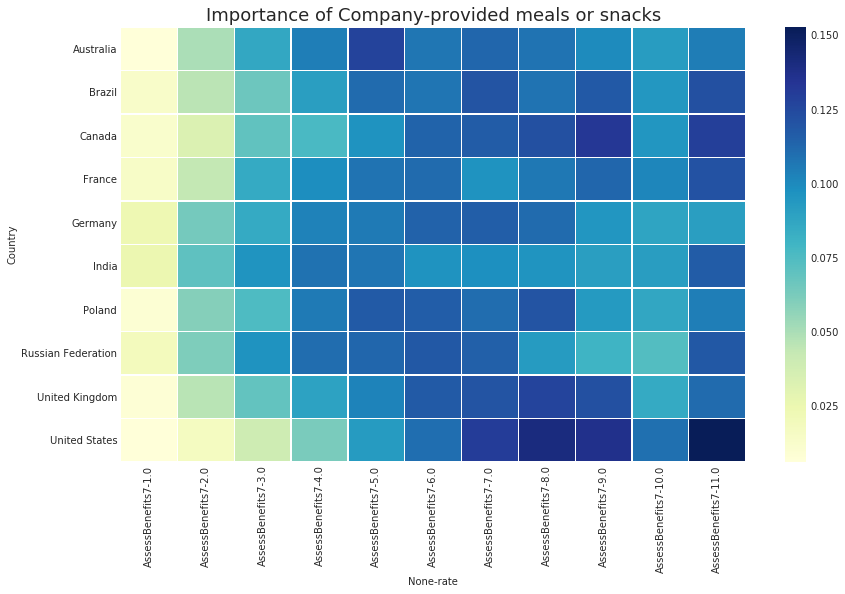

In [69]:
plot_heatmap(top10_df, 'AssessBenefits7')    
plt.title('Importance of Company-provided meals or snacks', fontsize=18)

> * Providing meals or snacks seems to be valued by developers in the 10 countries.
* Canadian and american developers are the ones who give the less value for providing meals or snacks to assess a potential job offer.

# Importance of Computer/office equipment allowance

Text(0.5,1,'Importance of Computer/office equipment allowance')

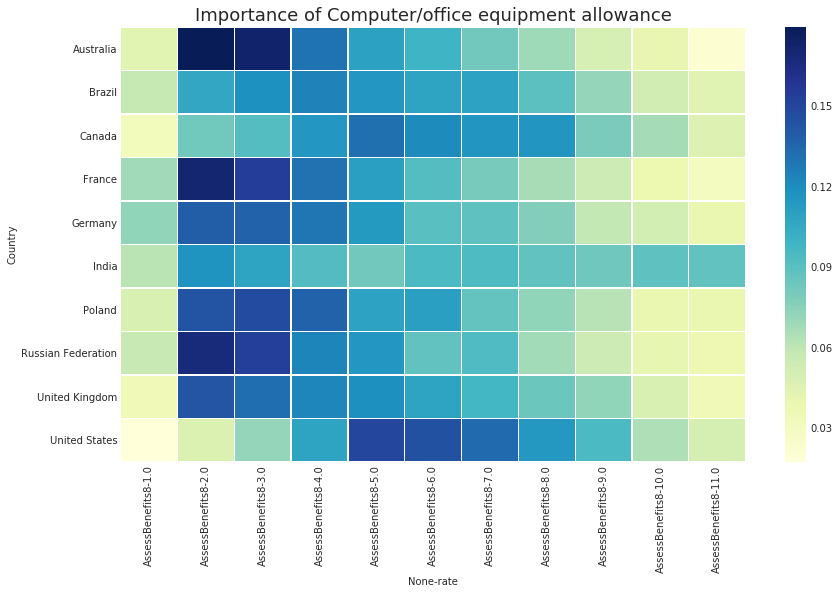

In [70]:
plot_heatmap(top10_df, 'AssessBenefits8')    
plt.title('Importance of Computer/office equipment allowance', fontsize=18)

> * Computer/Office equipement is important for developers to assess a potential job offer.
* Russian, Australian and Frensh developers seems to be the one who value the most computer/office equipement.

# Importance of offering Childcare benefit

Text(0.5,1,'Importance of Computer/office equipment allowance')

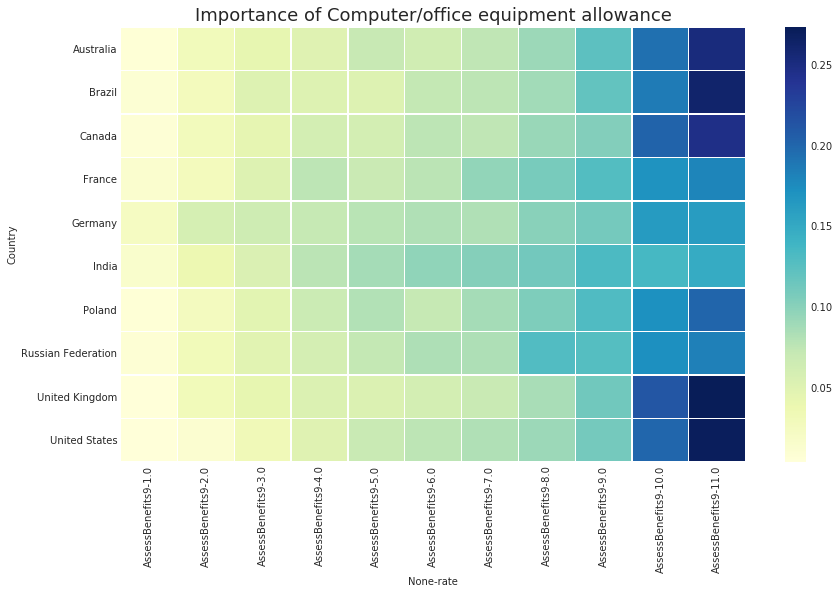

In [71]:
plot_heatmap(top10_df, 'AssessBenefits9')    
plt.title('Importance of Computer/office equipment allowance', fontsize=18)

> * Offering childcare benefit is not that important for developers to assess benefit package.

# Importance of Transportation benefit 

Text(0.5,1,'Importance of Transportation benefit')

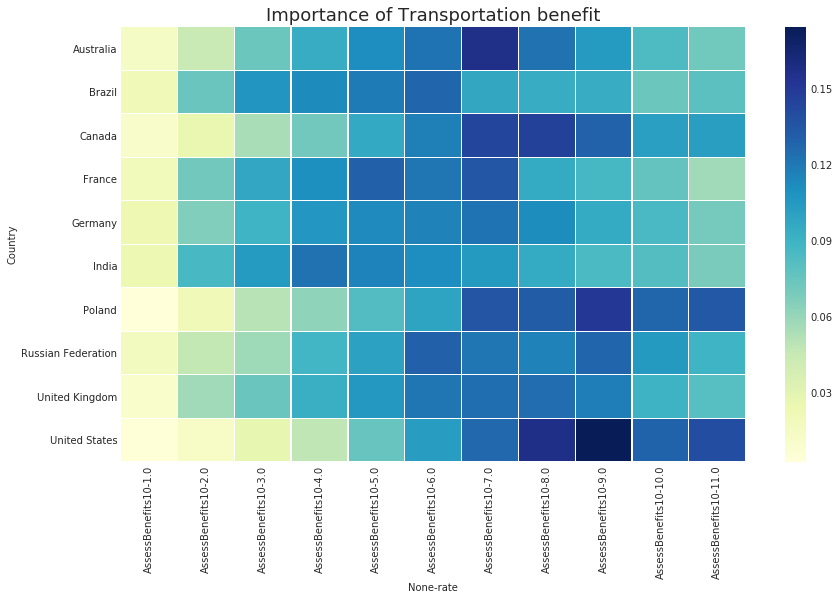

In [72]:
plot_heatmap(top10_df, 'AssessBenefits10')    
plt.title('Importance of Transportation benefit', fontsize=18)

> * Offering transportation benefits seems a bit important for developers 

# Importance of Conference or education budget

Text(0.5,1,'Importance of Conference or education budget')

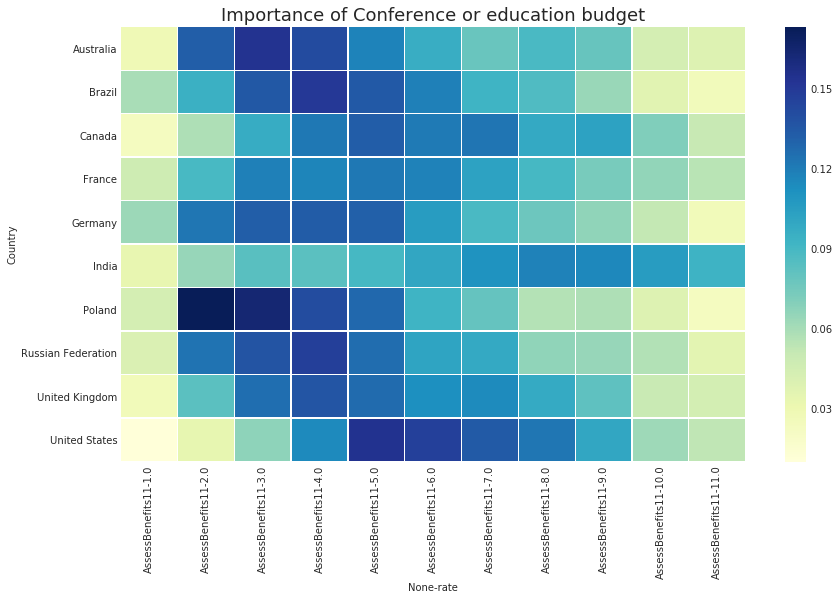

In [73]:
plot_heatmap(top10_df, 'AssessBenefits11')    
plt.title('Importance of Conference or education budget', fontsize=18)

> * Offering conference/education budget seems sligghtly important to developers.
* Polish developers are the ones who give conference/education budget the most value.

# Benefits assessement comparaison

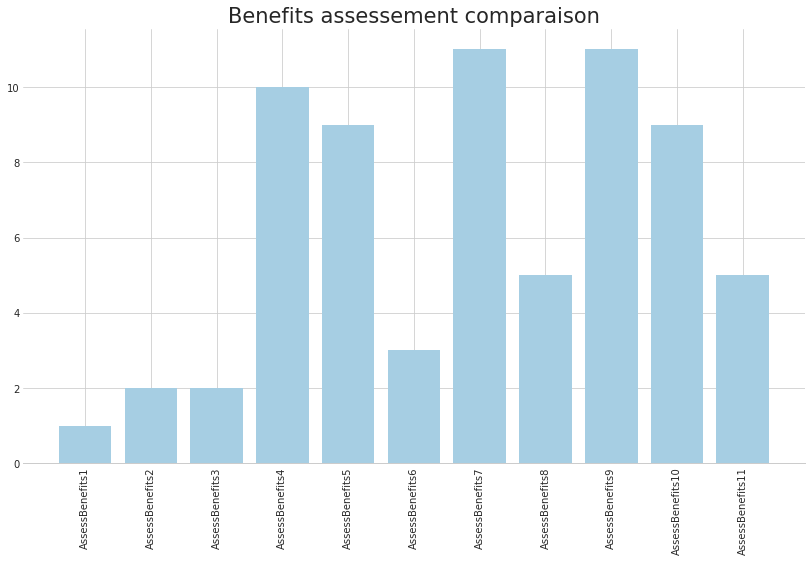

In [81]:
benefits_assesement = [
    'AssessBenefits1', 'AssessBenefits2', 'AssessBenefits3', 'AssessBenefits4', 'AssessBenefits5', 
    'AssessBenefits6','AssessBenefits7', 'AssessBenefits8', 'AssessBenefits9', 'AssessBenefits10', 'AssessBenefits11'
]

ff = top10_df[benefits_assesement].mode()#.groupby('Country').mean()[benefits_assesement].reset_index()
ff_p = ff.pivot_table(columns='Country')
plt.figure(figsize=(14, 8))
#for country in top_10_list:
 #   plt.plot(ff_p[country], label=country)
#plt.legend()
ff = pd.Series(index=ff.columns, data=ff.values[0])
plt.bar(ff.index, ff)
sns.despine(left=True)
plt.title('Benefits assessement comparaison', fontsize=21)
_ = plt.xticks(rotation='vertical')
#top10_df['AssessBenefits6'].mode()


> * We see that salary/bonuses is the moste important aspect in assessing a job's benefits package.
* Stock Options/Shares, health insurance and Retirement or pension savings matching are the next most important aspect in assessing a job's benefits package.
* Computer/office equipment allowance and Conference or education budget seems to be somewhat important in assessing a job's benefits package.
* Other aspect of jobs benefits package don't seem that important in assessing a job's benefits package.

# Personal life in the top 10 countries
* In this section, we'll try to get a deeper look at the developers peronal life in the top 10 countries taking the survey

# Wake up time in the top 10 countries

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

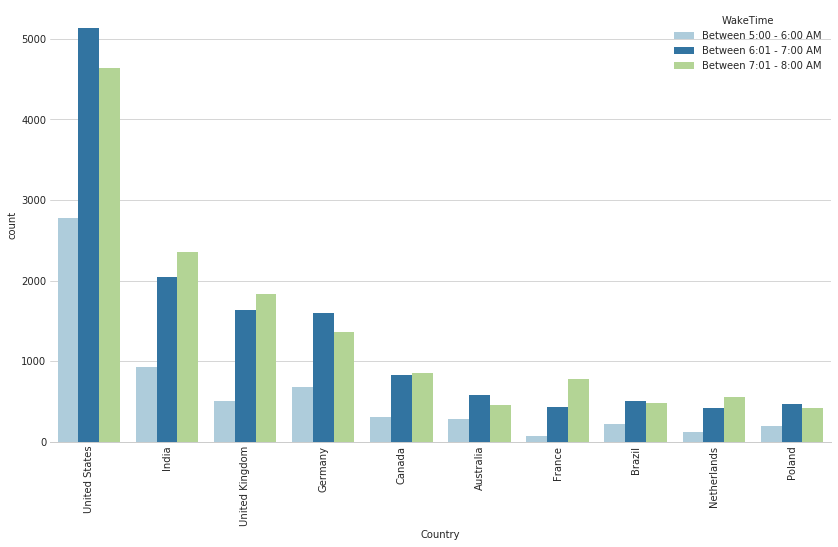

In [76]:
earlybirds = df[np.logical_or(np.logical_or(df['WakeTime'] == 'Between 7:01 - 8:00 AM', df['WakeTime'] == 'Between 6:01 - 7:00 AM'), df['WakeTime'] == 'Between 5:00 - 6:00 AM')] 

plt.figure(figsize=(14, 8))
sns.countplot(data=earlybirds, x='Country', hue='WakeTime', palette='Paired', order=earlybirds['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')


> We can see that most developpers in the top 10 countries wake up between 6 AM and 8 AM

# Hours spent on the computer

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

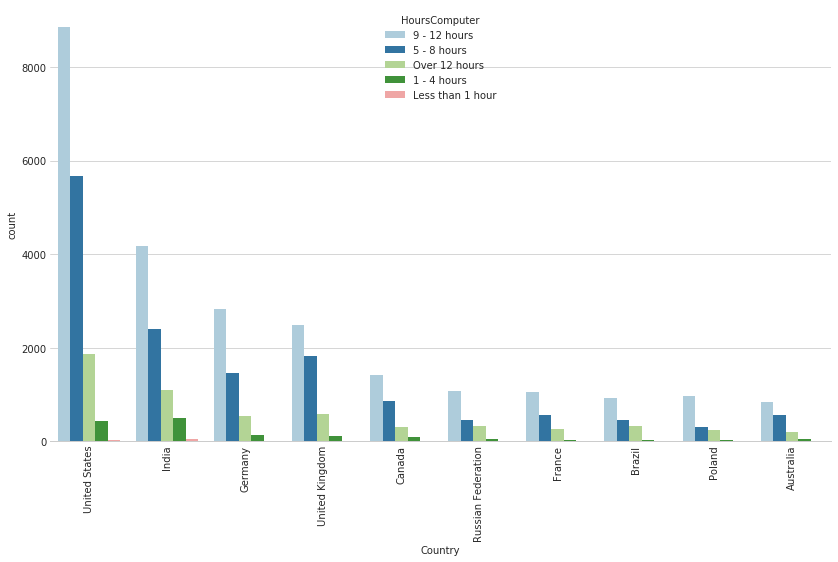

In [77]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursComputer', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> Most developpers spent between 5 and 12 hours on the computer.

# Hours outside

(array([0, 1, 2, 3, 4, 5, 6, 7, 8, 9]), <a list of 10 Text xticklabel objects>)

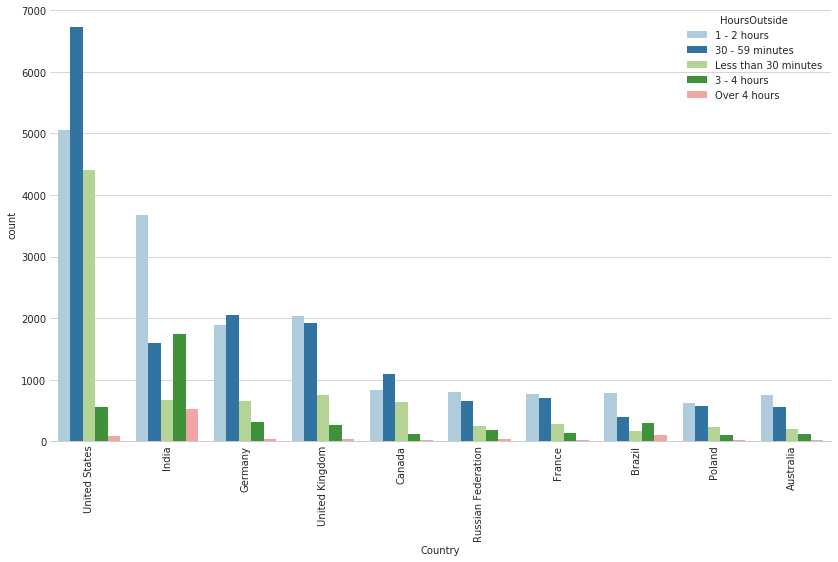

In [78]:
sat = df
plt.figure(figsize=(14, 8))
sns.countplot(data=sat, x='Country', hue='HoursOutside', palette='Paired', order=sat['Country'].value_counts()[:10].index)
sns.despine(left=True)
plt.xticks(rotation='vertical')

> * Except for india, in the other top 9 countries, most developpers are spending less than 2 hours outside.
> * In india, We can see that there is a high number of developpers who spent 3 to 4 hours outside, event the number of those who spent more than 4 hours outside is high if we compare it to the other countries.

# Who's skipping their meals ?

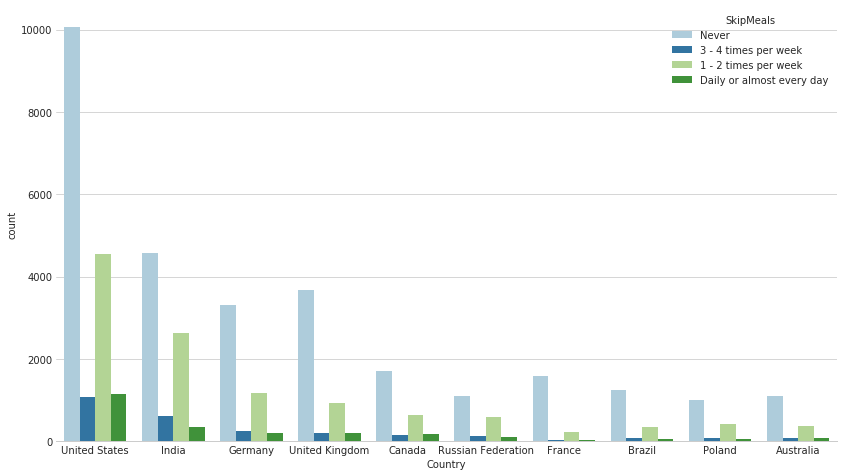

In [79]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x = 'Country', hue='SkipMeals', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> We can see the same pattern fot the top 10 countries, in which the majority of developpers never skip any meals

# Exercising

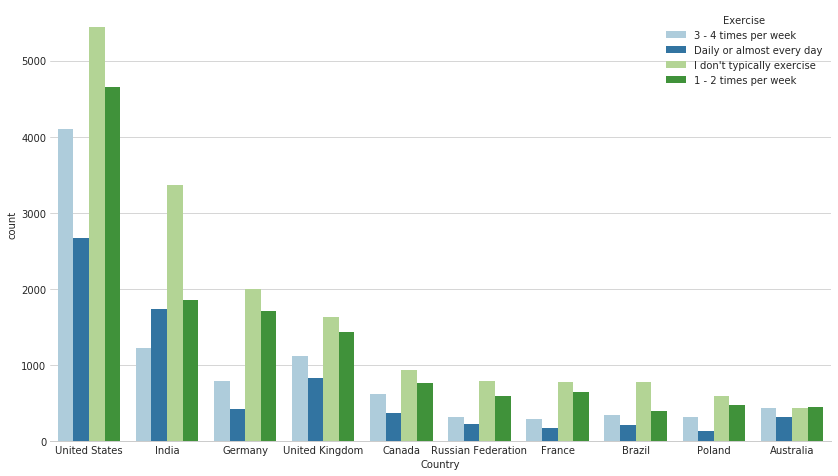

In [80]:
plt.figure(figsize=(14, 8))
sns.countplot(data=df, x='Country', hue='Exercise', palette='Paired', order=df['Country'].value_counts()[:10].index)
sns.despine(left=True)

> * Developpers do not typically exercice, or are excercicing for 1-2 times a week which is not enough.